In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import random

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.

    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(20,20))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [19]:
x_train_1=[]
y_train_1=[]
with open("data/D1.txt") as f:
    lines = f.read().splitlines()
for row in lines:
    numbers = [float(i) for i in row.split()]
    x_train_1.append(numbers[:2])
    y_train_1.append(numbers[2])

<ipython-input-21-1a985a36753c>:59: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.3)


<module 'matplotlib.pyplot' from 'C:\\Users\\46145\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

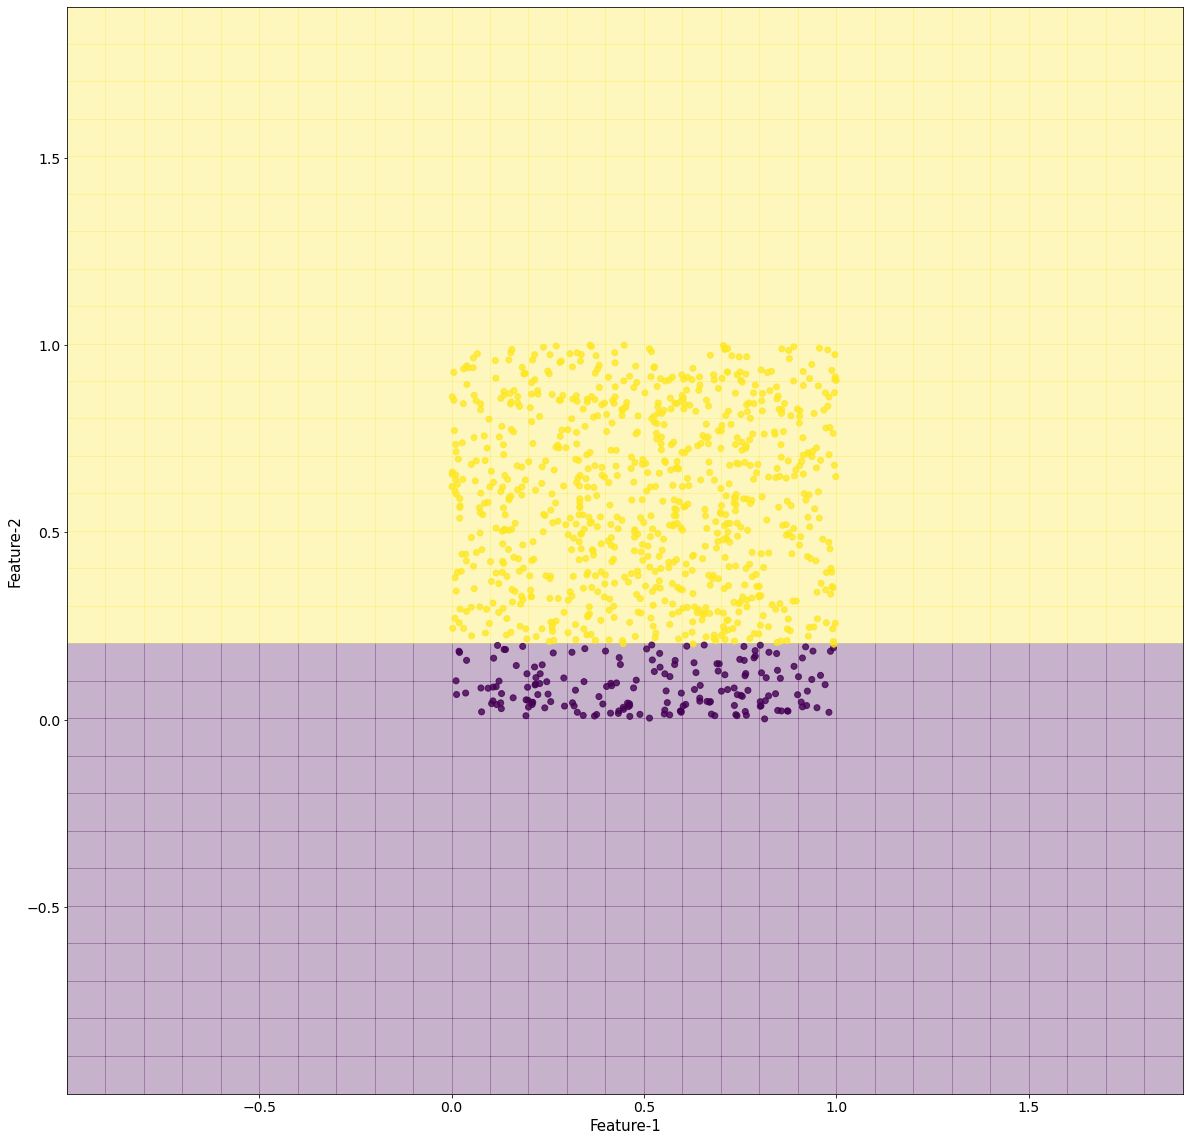

In [22]:
plot_decision_boundaries(x_train_1,y_train_1,DecisionTreeClassifier,criterion = "entropy")

In [23]:
x_train_2=[]
y_train_2=[]
with open("data/D2.txt") as f:
    lines = f.read().splitlines()
for row in lines:
    numbers = [float(i) for i in row.split()]
    x_train_2.append(numbers[:2])
    y_train_2.append(numbers[2])

<module 'matplotlib.pyplot' from 'C:\\Users\\46145\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

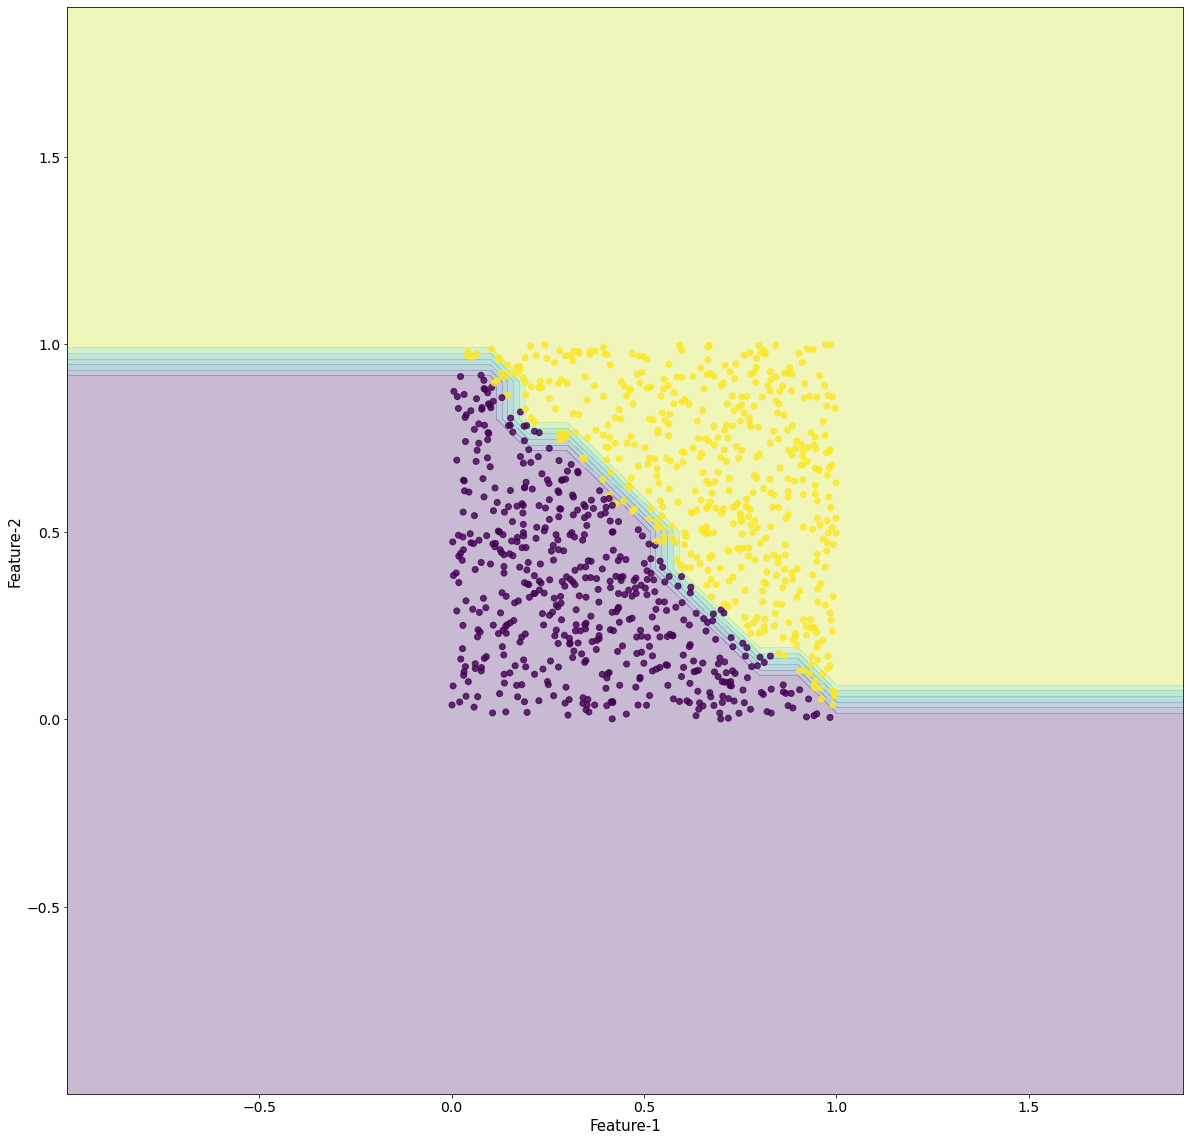

In [26]:
plot_decision_boundaries(x_train_2,y_train_2,DecisionTreeClassifier,criterion = "entropy")

In [28]:
raw_data = []
x_train_3=[]
y_train_3=[]
with open("data/Dbig.txt") as f:
    lines = f.read().splitlines()
for row in lines:
    numbers = [float(i) for i in row.split()]
    raw_data.append(numbers)

In [31]:
rlist=random.shuffle(raw_data)

In [43]:
train_3=raw_data[:8192]
x_train_3=[]
y_train_3=[]
for row in train_3:
    x_train_3.append(row[:2])
    y_train_3.append(row[2])


In [45]:
test_3=raw_data[8192:]
x_test_3=[]
y_test_3=[]
for row in test_3:
    x_test_3.append(row[:2])
    y_test_3.append(row[2])


In [50]:
D32=raw_data[:32]
D128=raw_data[:128]
D512=raw_data[:512]
D2048=raw_data[:2048]

In [64]:
def test(D, **params):
    count = 0
    x_train=[]
    y_train=[]
    for row in D:
        x_train.append(row[:2])
        y_train.append(row[2])
    clf = DecisionTreeClassifier(**params)
    clf = clf.fit(x_train, y_train) 
    n_nodes = clf.tree_.node_count
    #tree.plot_tree(clf)
    for entry in test_3:
        #print(entry[:2])
        if clf.predict([entry[:2]]) == [entry[2]]:
            continue
        else:
            count += 1
    return (n_nodes, count/len(test_3))

In [65]:
test(D32,criterion = "entropy")

(9, 0.11283185840707964)

In [66]:
test(D128,criterion = "entropy")

(37, 0.06581858407079647)

In [67]:
test(D512,criterion = "entropy")

(51, 0.04756637168141593)

In [68]:
test(D2048,criterion = "entropy")

(115, 0.025995575221238937)

In [69]:
test(train_3,criterion = "entropy")

(225, 0.014380530973451327)

In [70]:
def plottree(D):
    x_train=[]
    y_train=[]
    for row in D:
        x_train.append(row[:2])
        y_train.append(row[2])
    return plot_decision_boundaries(x_train,y_train,DecisionTreeClassifier,criterion = "entropy")

<module 'matplotlib.pyplot' from 'C:\\Users\\46145\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

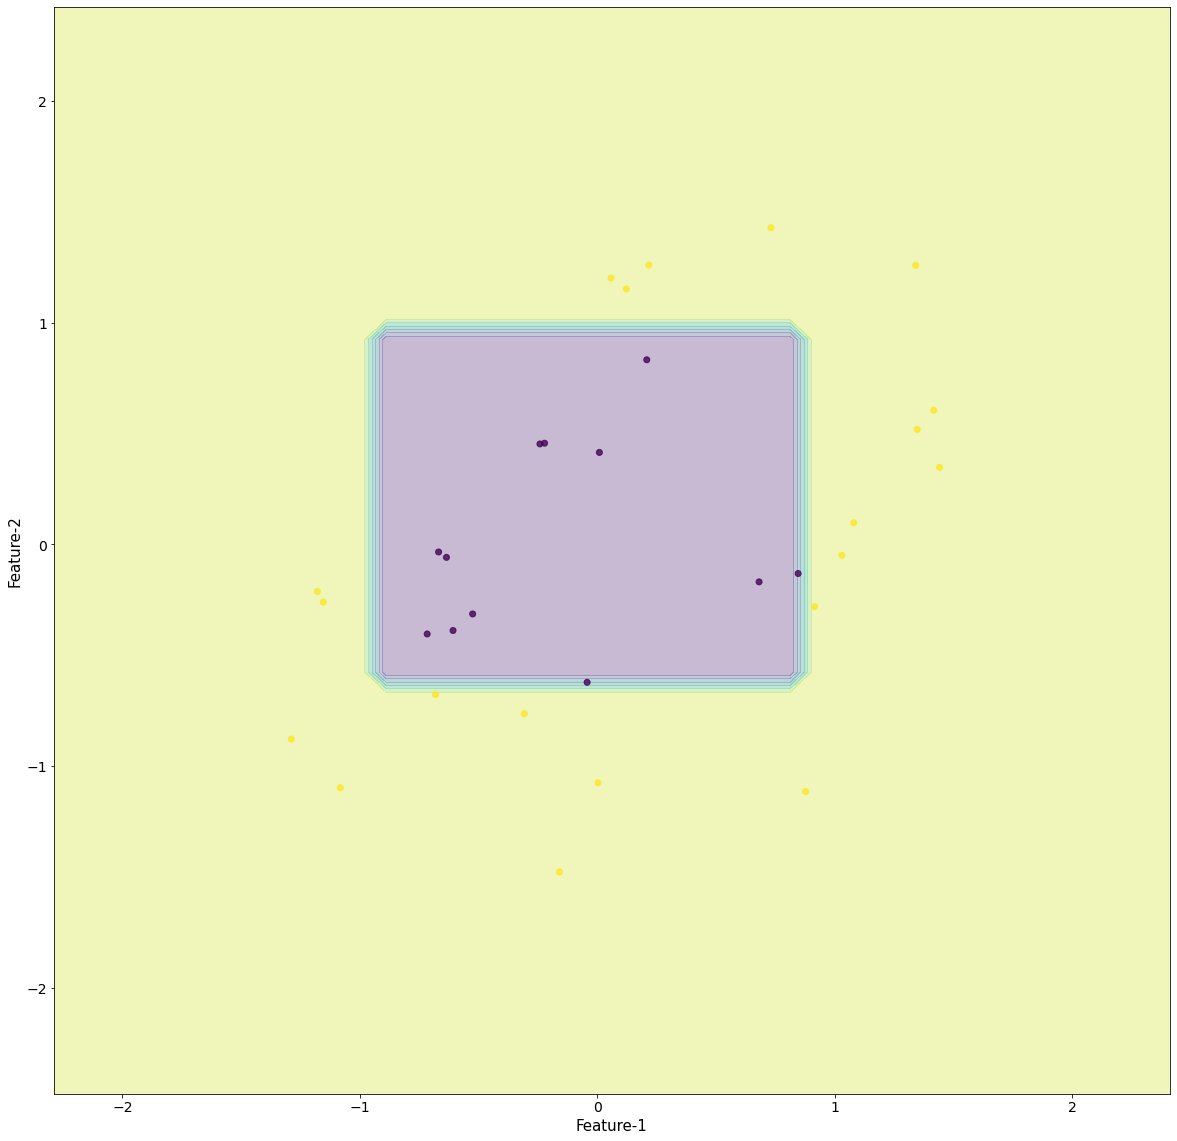

In [71]:
plottree(D32)

<module 'matplotlib.pyplot' from 'C:\\Users\\46145\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

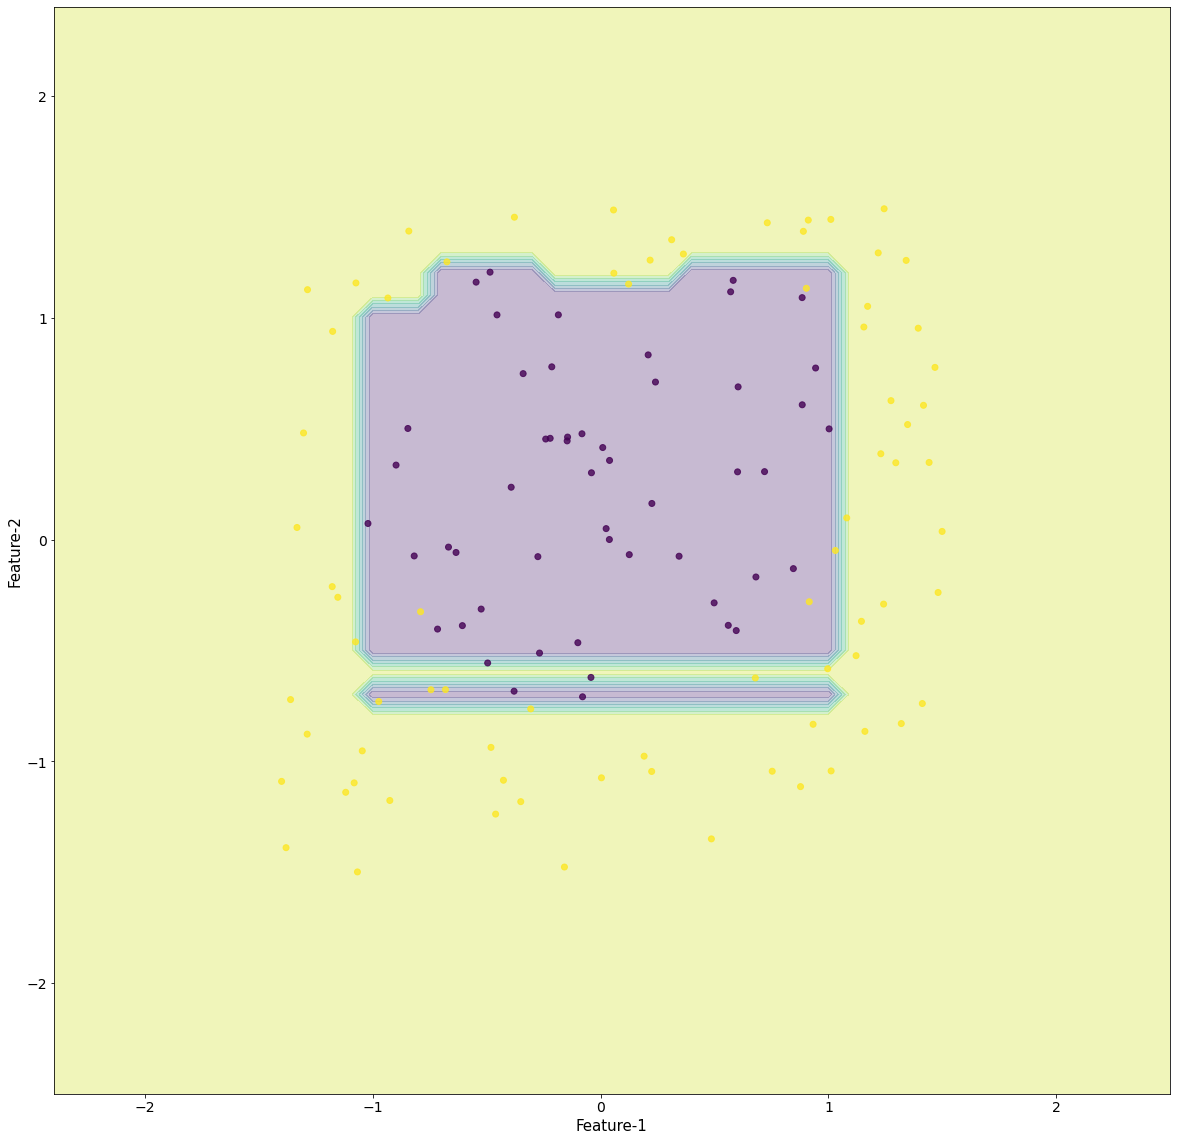

In [72]:
plottree(D128)

<module 'matplotlib.pyplot' from 'C:\\Users\\46145\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

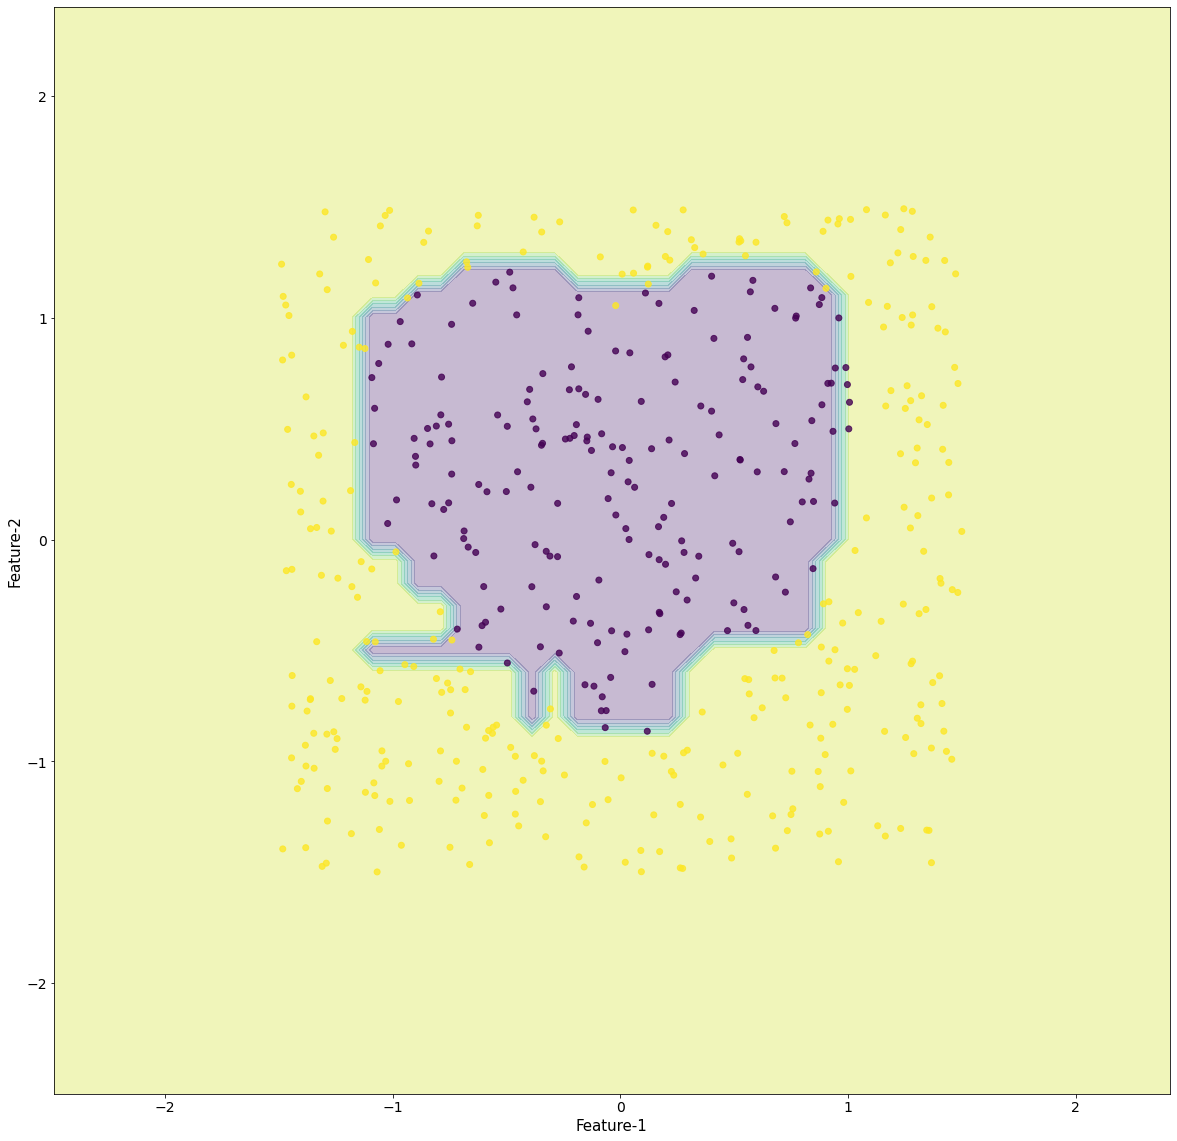

In [73]:
plottree(D512)

<module 'matplotlib.pyplot' from 'C:\\Users\\46145\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

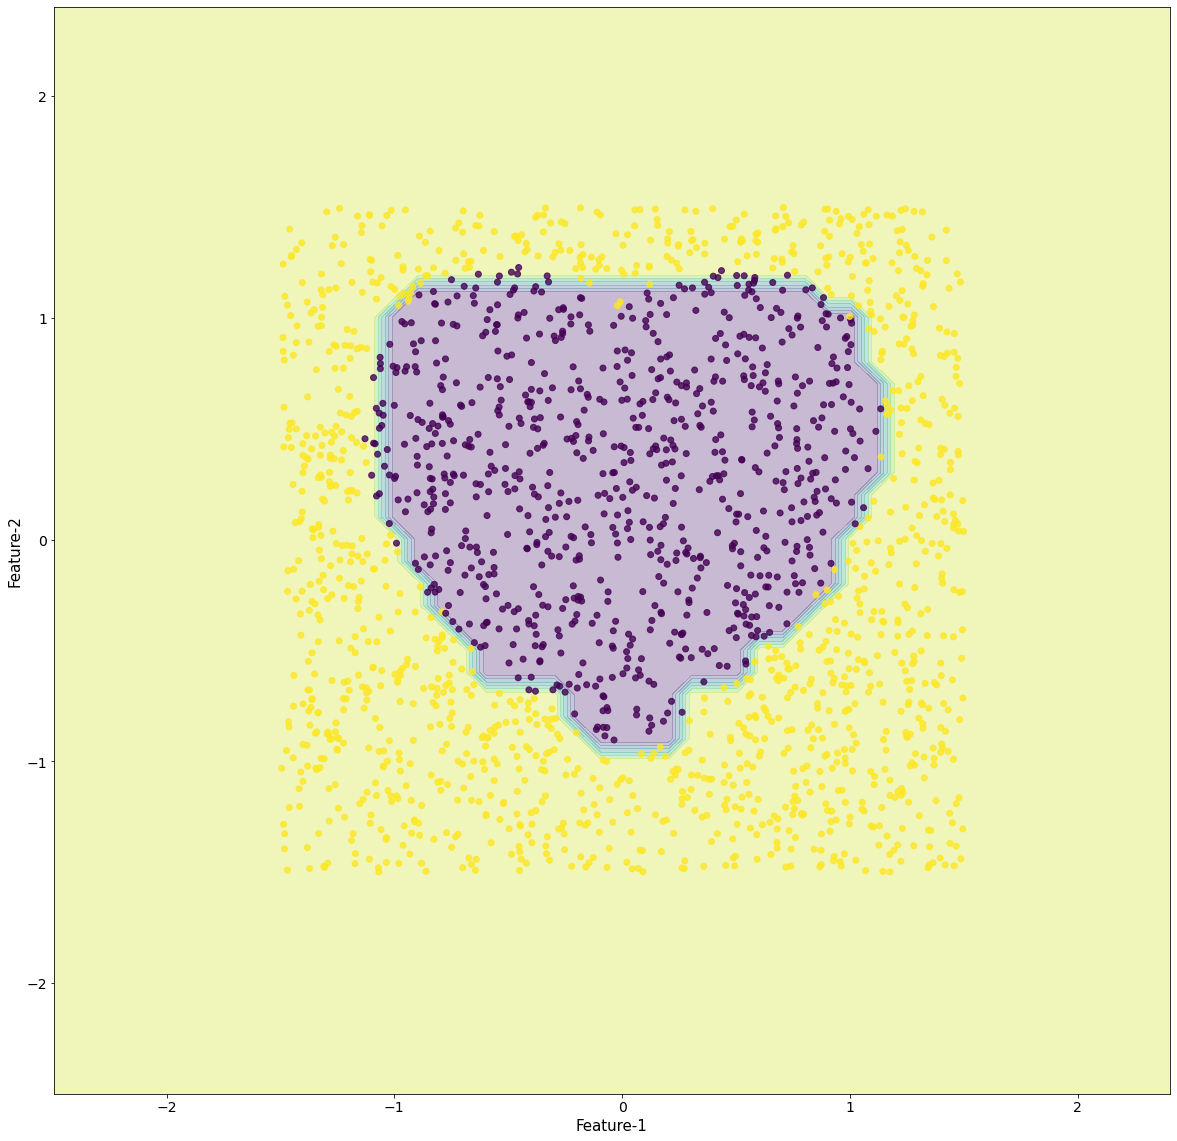

In [74]:
plottree(D2048)

<module 'matplotlib.pyplot' from 'C:\\Users\\46145\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

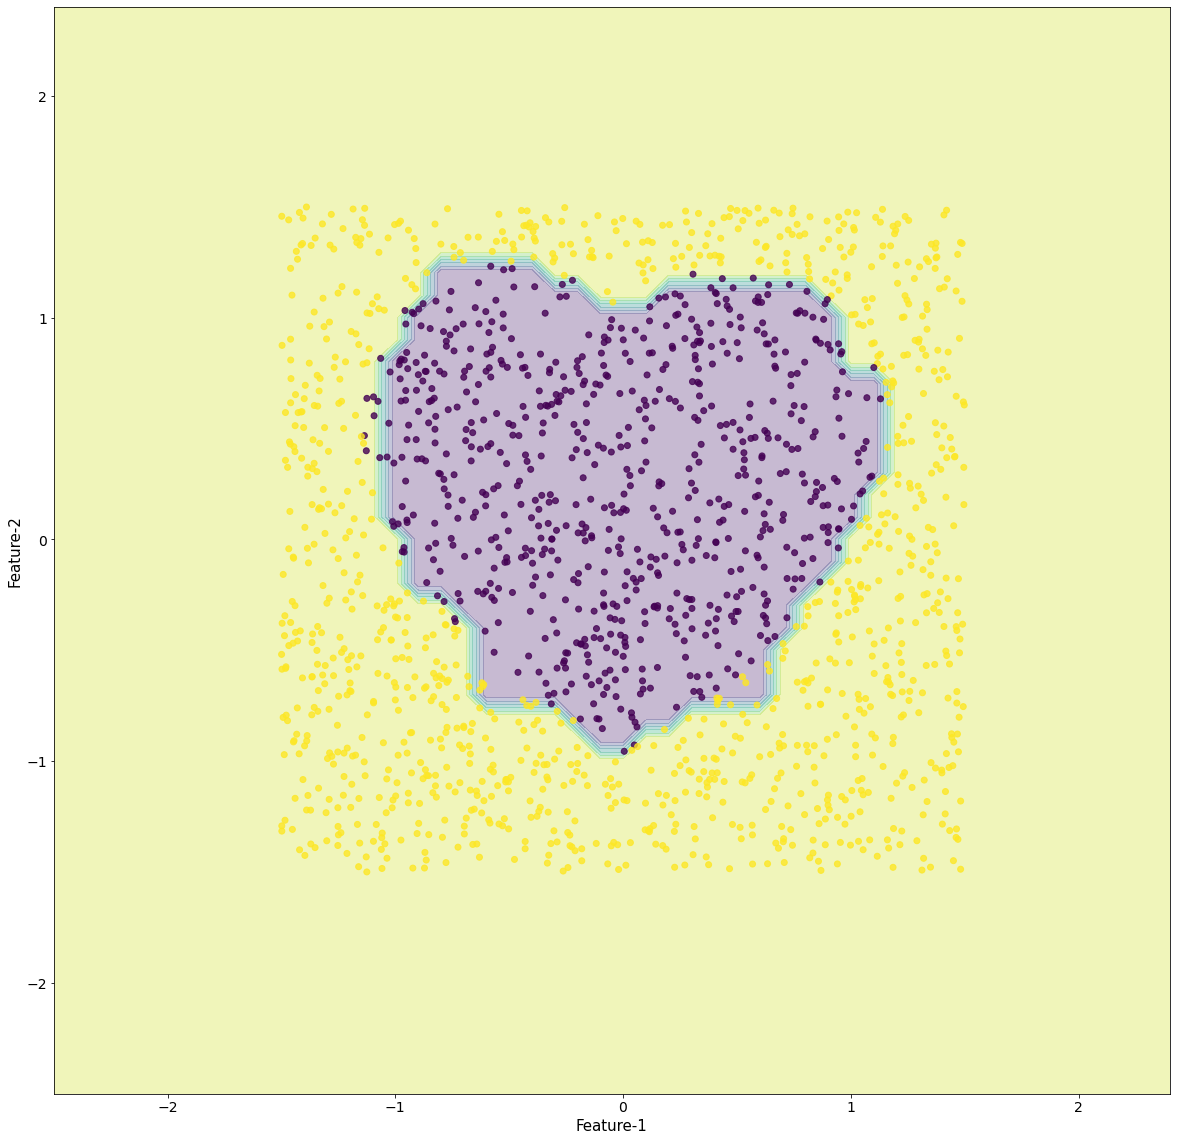

In [75]:
plottree(test_3)

In [76]:
test(D32,criterion = "gini")

(9, 0.11283185840707964)

In [77]:
test(D128,criterion = "gini")

(35, 0.09623893805309734)

In [78]:
test(D512,criterion = "gini")

(57, 0.053650442477876106)

In [79]:
test(D2048,criterion = "gini")

(137, 0.027101769911504425)

In [82]:
test(train_3,criterion = "gini")

(247, 0.014933628318584071)

In [81]:
len(test_3)

1808